In [103]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("https://datahack2020dataset.s3.us-east-2.amazonaws.com/OfficialCompetitionDataset.csv")
data.pop('Unnamed: 0')

print(f'data dimensions: {data.shape}')

data dimensions: (26504, 25)


In [104]:
data[:100]

,name,album,artist,auditory,beats_per_measure,beats_per_min,concert_probability,critic,critic_rating,danceability,hotness,hype,instrumentalness,length_minutes,lyricism,major/minor,nplays,positivity,review,reviewer_type,song_debut,styles,tone,volume,vulgar
0,A Forgotten Chapter In The History Of Ideas,VI,the fucking champs,0.240300,4.0,175.934,32.00,adam moerder,70.0,1.216527,1.0,0.627541,1.060468,388200,8.0,major,5026,-0.676431,\r\n What an opportune time for a Fucking C...,NaN,2007-04-24,rock,C#,0.794281,NOT VULGAR
1,I Would Like to Write a Song That...,Muted,alias,0.020610,4.0,97.017,24.40,william morris,60.0,1.382647,0.6,0.575489,1.256408,252560,7.0,major,7823,-0.684217,"Listen up, kids; it's time for me to play like...",NaN,2003-10-28,"electronic, rock",D,0.760773,NOT VULGAR
2,Awake On A Train,Yesterday Was Dramatic – Today Is OK,mm,0.882000,4.0,110.005,9.99,matt lemay,91.0,1.469614,4.0,0.498955,1.125781,563253,3.0,major,161260,0.016498,"Surprises are the best. Once, when I was in ki...",contributor,2005-10-04,"electronic, rock",F,0.738168,NOT VULGAR
3,Dress,Sylvan Esso,sylvan esso,2.571000,4.0,139.955,10.50,ian cohen,62.0,1.958150,8.8,0.456158,-0.844109,229840,9.0,minor,14379524,-0.964502,There are bands that arrive fully formed with ...,contributor,2014-05-13,pop/r&b,F,0.824472,NOT VULGAR
4,People Die,Travistan,travis morrison,0.221400,3.0,144.033,35.00,chris dahlen,0.0,2.377382,0.4,0.400788,-0.844077,262627,8.0,minor,4549,1.857820,Travis Morrison got his ass kicked. He tells ...,NaN,2004,pop/r&b,F,0.777020,NOT VULGAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Shake - Live in Europe; 2008 Remaste,Otis Blue: Otis Redding Sings Soul (Collector'...,otis redding,0.180300,4.0,176.738,76.40,nate patrin,100.0,1.306040,3.4,0.609766,-0.789268,173613,6.0,major,240604,1.262213,"On July 8, 1965, Otis Redding was a young soul...",contributor,1965-09-15,pop/r&b,C,0.814445,NOT VULGAR
96,Sometimes a Blonde,Spooked,robyn hitchcock,2.088000,4.0,101.307,10.00,stephen m. deusner,72.0,1.619310,0.0,0.332894,-0.839478,293080,0.0,major,12594,-1.170824,Robyn Hitchcock enlisted the help of Gillian W...,contributor,2004-10-05,rock,E,0.763522,NOT VULGAR
97,Dreams,Manners,passion pit,0.000618,4.0,150.000,9.99,ian cohen,81.0,1.493317,7.8,0.588342,-0.479845,258467,5.0,major,4901474,-0.851610,Even if the rock kids aren't doing the standi...,contributor,2009,pop/r&b,A,0.838985,NOT VULGAR
98,Cindy,Private Airplane,connections,0.027360,4.0,121.225,11.60,aaron leitko,76.0,1.509834,0.2,0.556181,0.227719,121573,4.0,major,14348,1.741034,"Within the first 30 seconds of “Finally"", the ...",contributor,2013-02-19,NaN,G,0.824411,NOT VULGAR


In [16]:
data['song_debut']

0        2007-04-24
1        2003-10-28
2        2005-10-04
3        2014-05-13
4              2004
            ...    
26499    2002-05-20
26500    2014-05-06
26501    2005-06-14
26502    2016-03-11
26503    2004-06-29
Name: song_debut, Length: 26504, dtype: object

In [105]:
data['song_debut'] = data['song_debut'].str.slice(0,4)
data['song_debut'] = data['song_debut'].astype('int64')

In [111]:
data['song_debut'].value_counts()

2006    2021
2008    1867
2007    1844
2005    1805
2013    1761
2009    1698
2010    1582
2011    1569
2014    1546
2003    1490
2016    1412
2004    1354
2002    1204
2015    1173
2012    1166
2001     966
2000     628
1999     296
1998     154
2019     100
2020      94
1965      69
1979      64
1992      58
1971      50
1994      46
1970      45
1989      45
1995      42
2017      42
1977      37
1984      36
1993      28
1975      22
1985      21
1968      19
1986      18
1996      14
1991      13
1981      12
1997      12
1972      11
1982      11
1988      10
1978      10
1960       9
1969       9
1952       9
1983       7
2018       5
Name: song_debut, dtype: int64

In [133]:
years = data['song_debut'].unique()
print(years)
counts = data['song_debut'].value_counts()[years].values

[2007 2003 2005 2014 2004 2010 2009 2012 2000 2011 2008 2002 2006 2013
 2001 2015 1971 2016 2017 1999 1965 1979 1998 1977 1989 1984 2020 1995
 1970 2019 1993 1988 1991 1981 1992 1978 1969 1994 1968 1986 2018 1972
 1985 1997 1960 1982 1983 1975 1952 1996]


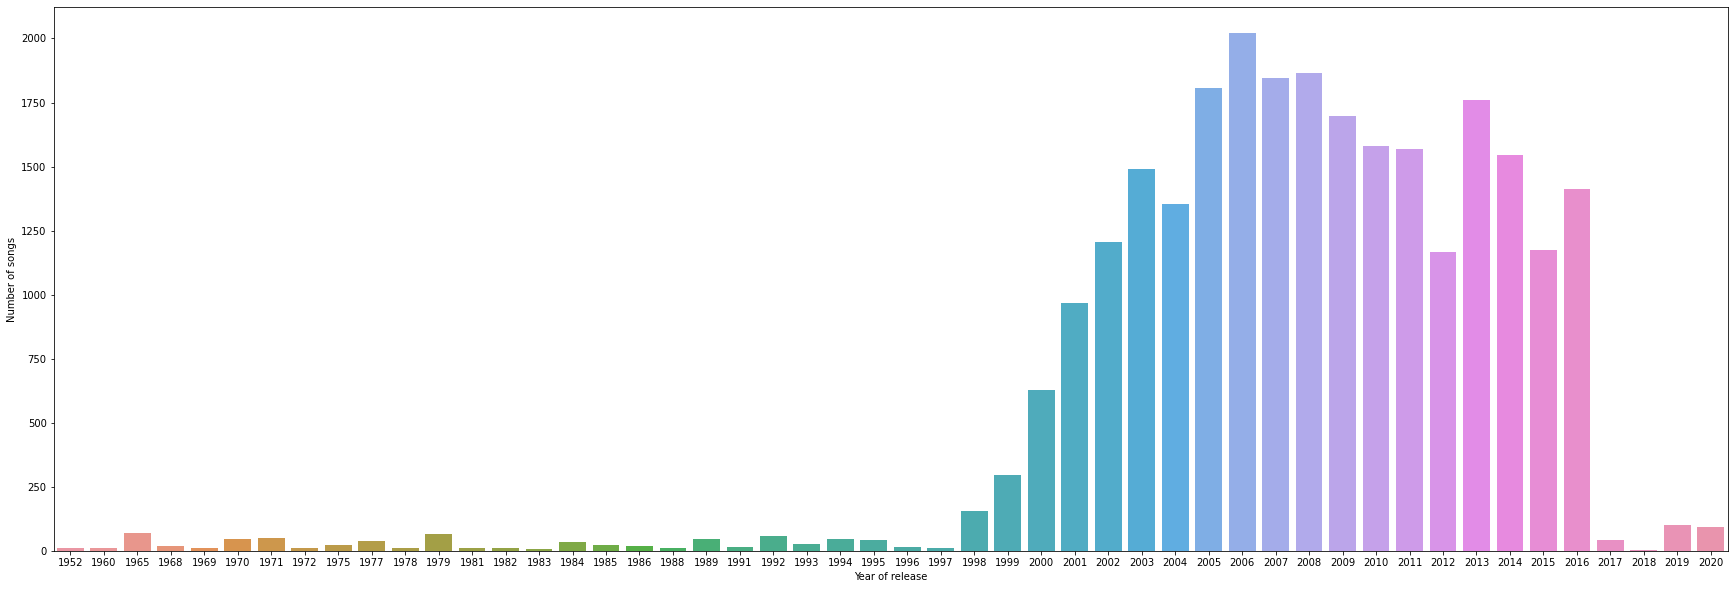

In [147]:
plt.figure(figsize=(30,10))
sns.barplot(x=years, y=counts)
plt.xlabel('Year of release')
plt.ylabel('Number of songs');

In [144]:
(data['reviewer_type'].isna()).sum()

6165

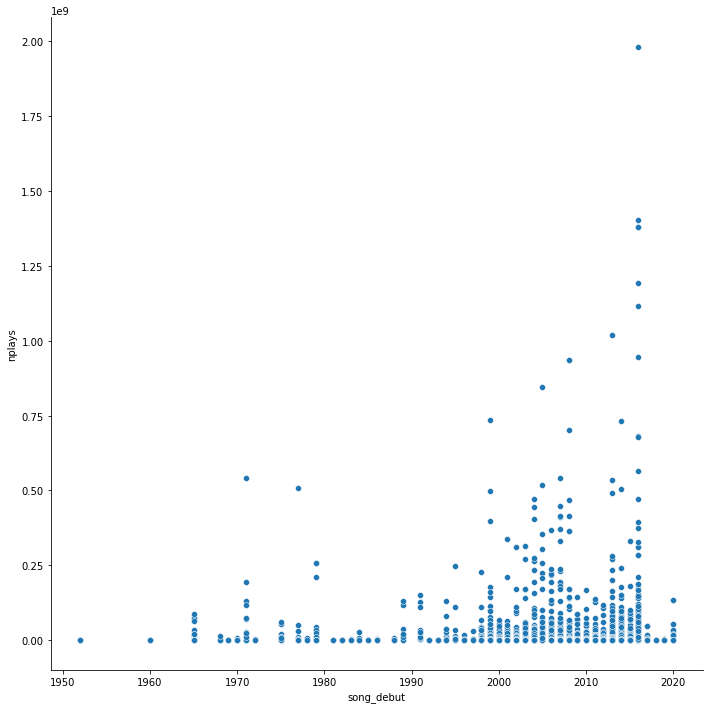

In [34]:
sns.pairplot(data=data, x_vars=['song_debut'], y_vars=['nplays'], height=10);

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
data['song_debut'].values

array([2007, 2003, 2005, ..., 2005, 2016, 2004])

In [55]:
scaler = MinMaxScaler()

normalized_plays = []
for i in data['song_debut'].values:
  norm = data[data['song_debut'] == i]
  nplays = scaler.fit_transform(norm['nplays'].to_numpy().reshape(-1,1))
  normalized_plays.append(np.std(nplays  ))

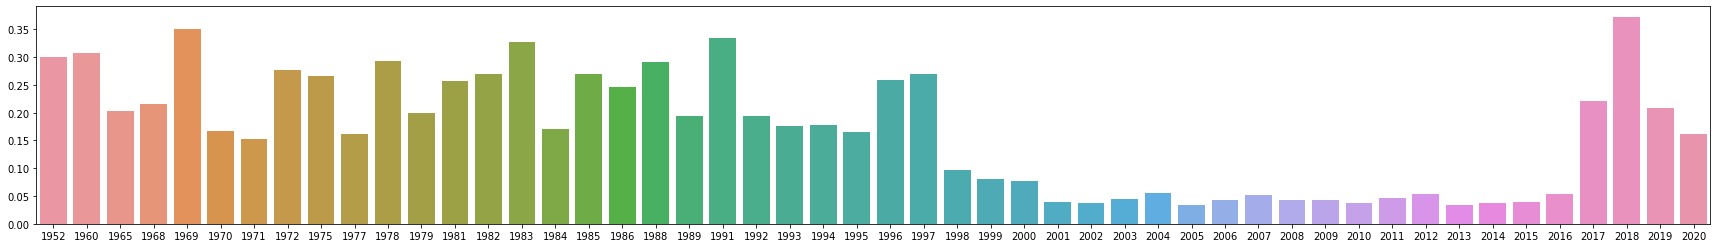

In [61]:
plt.figure(figsize=(30,4))
sns.barplot(x=data['song_debut'].values, y=normalized_plays);

In [62]:
data['album'].value_counts()

Keep An Eye On The Sky                                      43
Underwater Moonlight                                        40
Otis Blue: Otis Redding Sings Soul (Collector's Edition)    40
You'll Never Play This Town Again                           40
II                                                          40
                                                            ..
The Cavern                                                   1
Wuppdeckmischmampflow                                        1
Silent Night                                                 1
Is Fixed                                                     1
IAO Chant from the Cosmic Inferno                            1
Name: album, Length: 2397, dtype: int64

In [71]:
data.loc[data['nplays'].idxmax(),:]

name                                                              Closer
album                                                         Collage EP
artist                                                  the chainsmokers
auditory                                                           1.245
beats_per_measure                                                      4
beats_per_min                                                     94.949
concert_probability                                                   11
critic                                                      kevin lozano
critic_rating                                                         35
danceability                                                     2.09175
hotness                                                             11.8
hype                                                            0.432432
instrumentalness                                               -0.844512
length_minutes                                     

In [92]:
most_popular = []
for i in np.sort(data['song_debut'].unique()):
  year = data[data['song_debut']==i]
  most_popular.append(year.loc[year['nplays'].idxmax(),:])
pd.DataFrame(most_popular)

,name,album,artist,auditory,beats_per_measure,beats_per_min,concert_probability,critic,critic_rating,danceability,hotness,hype,instrumentalness,length_minutes,lyricism,major/minor,nplays,positivity,review,reviewer_type,song_debut,styles,tone,volume,vulgar
17675,Juke Box Blues,Keep On the Sunny Side - June Carter Cash: Her...,june carter cash,2.589000,4.0,113.283,13.10,stephen m. deusner,77.0,2.349024,5.2,0.304539,-0.842675,138600,7.0,major,1064255,1.702106,June Carter Cash's first-ever retrospective is...,contributor,1952,folk/country,F#,0.786572,NOT VULGAR
24060,Jin-Go-Lo-Ba (Jin-Go-Low-Bah),Drums Of Passion,babatunde olatunji,1.572000,4.0,125.995,11.70,mia clarke,82.0,2.044187,4.8,0.639219,-0.825871,205267,4.0,major,182171,0.931320,Nigerian drummer Babatunde Olatunji enjoyed a ...,NaN,1960,global,C,0.851746,NOT VULGAR
24588,Turn! Turn! Turn! (To Everything There Is a Se...,The Essential Byrds,the byrds,0.351000,4.0,124.594,3.93,joe tangari,84.0,1.566745,8.2,0.593879,-0.844450,229533,5.0,major,87043094,1.277784,"Someday, some enterprising soul will establish...",contributor,1965,rock,D,0.795940,NOT VULGAR
26034,You Ain't Goin' Nowhere,Sweetheart Of The Rodeo (Legacy Edition),the byrds,0.251700,4.0,132.041,74.00,alexander lloyd linhardt,97.0,1.712578,4.2,0.359770,-0.841246,153867,3.0,major,13970126,0.736677,A confession: I have totally fallen for this G...,NaN,1968,rock,C,0.704920,NOT VULGAR
11696,I Walk the Line - Live at San Quentin State Pr...,At San Quentin (Legacy Edition),johnny cash,2.052000,4.0,121.712,95.30,amanda petrusich,77.0,1.803988,5.4,0.461215,-0.844507,147707,6.0,major,696341,1.756606,The California State Penitentiary at San Quent...,contributor,1969,folk/country,Bb,0.774241,NOT VULGAR
21100,I'd Like To Walk Around In Your Mind,Just Another Diamond Day,vashti bunyan,2.760000,3.0,174.963,11.60,matthew murphy,90.0,1.236148,11.2,0.170586,-0.843859,135453,6.0,major,7758425,0.397998,One of the happiest by-products of the ongoing...,contributor,1970,rock,C,0.663211,NOT VULGAR
1604,Stairway to Heaven - 1990 Remaster,Led Zeppelin IV,led zeppelin,1.725000,4.0,84.204,18.50,mark richardson,91.0,1.413403,13.6,0.288931,-0.826170,478173,2.0,major,540684680,-0.758181,"With Led Zeppelin, there was no break-in perio...",executive editor,1971,rock,G,0.730167,NOT VULGAR
22674,Hallogallo,Neu!,neu!,0.348000,4.0,152.599,7.23,brent s. sirota,97.0,1.855214,7.4,0.575489,1.457792,607427,3.0,major,5274231,1.410141,Now is the time on Pitchfork when we dance! As...,NaN,1972,NaN,A,0.705227,NOT VULGAR
17469,Tangled up in Blue,Blood On The Tracks,bob dylan,1.242000,4.0,100.965,9.62,jesse jarnow,100.0,1.523484,13.0,0.507420,-0.844509,341627,5.0,major,61209073,0.569284,One doesn't have to be a broken-hearted straig...,contributor,1975,rock,A,0.719832,NOT VULGAR
9878,Mr. Blue Sky,Out of the Blue,electric light orchestra,1.956000,4.0,177.784,24.80,rob mitchum,81.0,1.474030,16.4,0.291176,-0.844502,303373,2.0,major,508267325,0.269534,\r\n Here's a shocking fact: 2007 marks the...,contributor,1977,rock,Bb,0.767008,NOT VULGAR


In [90]:
data[data['name'].values in most_popular]

ValueError: ignored

In [98]:
data['song_debut'] = data['song_debut'].str.slice(0,4)
data['song_debut'] = data['song_debut'].astype('int64')

data[data['song_debut'] == 2018]

,name,album,artist,auditory,beats_per_measure,beats_per_min,concert_probability,critic,critic_rating,danceability,hotness,hype,instrumentalness,length_minutes,lyricism,major/minor,nplays,positivity,review,reviewer_type,song_debut,styles,tone,volume,vulgar
2293,Alma Do Meu Pai,Alma Do Meu Pai,dj firmeza,0.564000,4.0,143.031,14.30,meaghan garvey,76.0,2.172764,1.4,0.650240,1.346214,389658,7.0,major,64924,-1.151360,"Batida, the umbrella term for the variant stra...",contributor,2018,electronic,G,0.842210,NOT VULGAR
6555,Coelho 2025,Alma Do Meu Pai,dj firmeza,0.000128,4.0,128.211,4.22,meaghan garvey,76.0,2.093841,1.6,0.531804,0.290311,152884,7.0,minor,11676,-0.680324,"Batida, the umbrella term for the variant stra...",contributor,2018,electronic,Ab,0.839875,NOT VULGAR
10136,Somos Melão Doce,Alma Do Meu Pai,dj firmeza,0.001566,4.0,144.081,20.60,meaghan garvey,76.0,2.117000,0.8,0.550431,1.479563,132019,8.0,major,20708,0.250069,"Batida, the umbrella term for the variant stra...",contributor,2018,electronic,G,0.844006,NOT VULGAR
12981,Suposto,Alma Do Meu Pai,dj firmeza,0.134400,4.0,131.038,10.30,meaghan garvey,76.0,2.302510,0.8,0.557900,1.215587,132447,9.0,minor,6423,1.258320,"Batida, the umbrella term for the variant stra...",contributor,2018,electronic,E,0.833011,NOT VULGAR
24628,Start Go,Alma Do Meu Pai,dj firmeza,0.278100,4.0,131.972,6.18,meaghan garvey,76.0,2.384525,0.4,0.666803,0.352904,139878,9.0,major,5245,-0.664752,"Batida, the umbrella term for the variant stra...",contributor,2018,electronic,Ab,0.843561,NOT VULGAR
